In [22]:
%matplotlib inline    # Graphiques affichés dans la feuille notebook

In [23]:
from __future__ import division, print_function   # si on travaille en python 2.x
from codecs import open
import numpy as np
import pylab as plt

# I. Data de l'article Berroir issue d'un fichier CSV

In [24]:
import pandas as pd

In [25]:
data = pd.read_csv("Data_Berroir.csv", delimiter=';')
X = data['x']
Y = data['y']
nDOF = len(X)

In [26]:
data

,x,y
0,0.0,14.79
1,2.0,33.52
2,4.0,36.50
3,6.0,51.88
4,8.0,63.11
5,10.0,66.94
6,12.0,74.58
7,14.0,92.46
8,16.0,89.50
9,18.0,109.29


# II. Création des Fits

On vérifie sur les exemples suivants la prise en compte des incertitudes des points sur les résultats des régressions (linéaires ici)

In [27]:
from scipy.optimize import curve_fit

In [28]:
def flin(x,a,b):
    return a*x+b

## 1. Fit sans incertitude

On consière que les points n'ont pas d'incertitude en Y

In [29]:
p, covm = curve_fit(flin, X, Y)
a,b = p
yth = flin(X, a, b)
chi2 = sum(((yth - Y))**2)
chi2_red = chi2/(nDOF - 2) 
erra, errb = np.sqrt(np.diag(covm))
print("pente = %.3f +/- %.3f"  %(a, erra))
print("ordonnée origine = %.2f +/- %.2f" %(b, errb))
print("chi2 = %.0f" % chi2)
print("chi2_red = %.1f" % chi2_red)

pente = 4.699 +/- 0.199
ordonnée origine = 20.68 +/- 2.59
chi2 = 227
chi2_red = 22.7


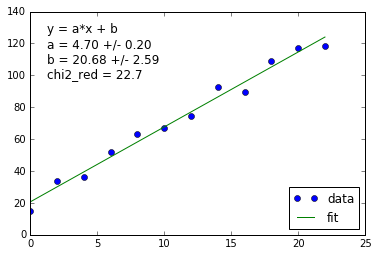

In [30]:
fig, ax = plt.subplots(1)
ax.plot(X,Y,'o',label="data")
ax.plot(X,yth,label="fit")
textstr = "y = a*x + b\n\
a = %.2f +/- %.2f \n\
b = %.2f +/- %.2f \n\
chi2_red = %.1f"  %(a,erra,b,errb,chi2_red)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top')
ax.legend(loc=4)

## 2. Avec incertitude sigma_exp = 5 (constante)

In [31]:
sigma_exp = 5
p, covm = curve_fit(flin, X, Y,sigma=sigma_exp)
a,b = p
yth = flin(X, a, b)
chi2 = sum(((yth - Y)/sigma_exp)**2)
chi2_red = chi2/(nDOF - 2) 
erra, errb = np.sqrt(np.diag(covm)/chi2_red)
print("pente = %.3f +/- %.3f"  %(a, erra))
print("ordonnée origine = %.2f +/- %.2f" %(b, errb))
print("chi2 = %.2f" % chi2)
print("chi2_red = %.3f" % chi2_red)

pente = 4.699 +/- 0.209
ordonnée origine = 20.68 +/- 2.72
chi2 = 9.08
chi2_red = 0.908


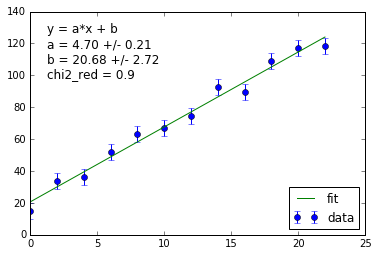

In [32]:
fig, ax = plt.subplots(1)
ax.errorbar(X,Y,sigma_exp,fmt='o',label="data")
ax.plot(X,yth,label="fit")
textstr = "y = a*x + b\n\
a = %.2f +/- %.2f \n\
b = %.2f +/- %.2f \n\
chi2_red = %.1f"  %(a,erra,b,errb,chi2_red)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top')
ax.legend(loc=4)

## 2. Avec incertitude sigma_exp = 20  (constante)

In [33]:
sigma_exp = 20
p, covm = curve_fit(flin, X, Y,sigma=sigma_exp)
a,b = p
yth = flin(X, a, b)
chi2 = sum(((yth - Y)/sigma_exp)**2)
chi2_red = chi2/(nDOF - 2) 
erra, errb = np.sqrt(np.diag(covm)/chi2_red)
print("pente = %.3f +/- %.3f"  %(a, erra))
print("ordonnée origine = %.2f +/- %.2f" %(b, errb))
print("chi2 = %.2f" % chi2)
print("chi2_red = %.3f" % chi2_red)

pente = 4.699 +/- 0.836
ordonnée origine = 20.68 +/- 10.86
chi2 = 0.57
chi2_red = 0.057


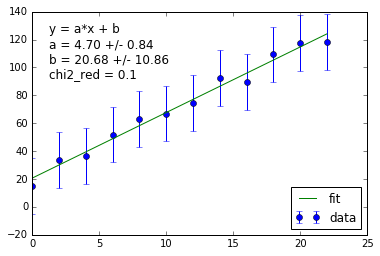

In [34]:
fig, ax = plt.subplots(1)
ax.errorbar(X,Y,sigma_exp,fmt='o',label="data")
ax.plot(X,yth,label="fit")
textstr = "y = a*x + b\n\
a = %.2f +/- %.2f \n\
b = %.2f +/- %.2f \n\
chi2_red = %.1f"  %(a,erra,b,errb,chi2_red)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top')
ax.legend(loc=4)

## 3. Avec une incertitude égale à 10% de y (variable)

In [35]:
sigma_exp = 0.1*Y
p, covm = curve_fit(flin, X, Y,sigma=sigma_exp)
a,b = p
yth = flin(X, a, b)
chi2 = sum(((yth - Y)/sigma_exp)**2)
chi2_red = chi2/(nDOF - 2) 
erra, errb = np.sqrt(np.diag(covm)/chi2_red)
print("pente = %.3f +/- %.3f"  %(a, erra))
print("ordonnée origine = %.2f +/- %.2f" %(b, errb))
print("chi2 = %.2f" % chi2)
print("chi2_red = %.3f" % chi2_red)

pente = 5.108 +/- 0.237
ordonnée origine = 16.38 +/- 1.32
chi2 = 9.30
chi2_red = 0.930


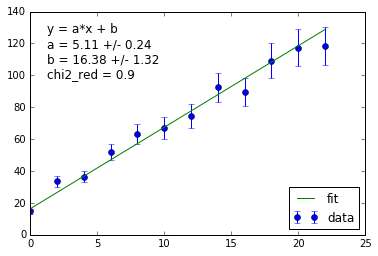

In [36]:
fig, ax = plt.subplots(1)
ax.errorbar(X,Y,sigma_exp,fmt='o',label="data")
ax.plot(X,yth,label="fit")
textstr = "y = a*x + b\n\
a = %.2f +/- %.2f \n\
b = %.2f +/- %.2f \n\
chi2_red = %.1f"  %(a,erra,b,errb,chi2_red)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top')
ax.legend(loc=4)
#ax.xlim(-1,25)